# Chapter 2 - Large-scale data analysis with spaCy

## Data Structures (1)

spaCy armazena todos os dados compartilhados em um vocabulário, o Vocab. 

Isso inclui palavras, mas também os esquemas de rótulos para tags e entidades. 

Para economizar memória, todas as strings são codificadas em hash IDs. Se uma palavra ocorrer mais de uma vez, não precisamos salvá-la todas as vezes. Em vez disso, spaCy usa uma função hash para gerar um ID e armazena a string apenas uma vez. 

O armazenamento de strings está disponível como pontos de strings no vocabulário nlp. Que é uma tabela de pesquisa que funciona nas duas direções. Você pode pesquisar uma string e obter seu hash, e pesquisar um hash para obter seu valor de string. Internamente, spaCy se comunica apenas em IDs de hash. 

No entanto, os Hash IDs não podem ser revertidos. Se uma palavra não estiver no vocabulário, não há como obter sua string. É por isso que sempre precisamos repassar o vocabulário compartilhado.

In [1]:
from spacy.lang.en import English

In [3]:
nlp_en = English()

doc = nlp_en("I love coffee")

print("hash value:", nlp_en.vocab.strings['coffee'])
print("string value:", nlp_en.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


Para obter o hash de uma string, podemos procurá-lo em strings de pontos de vocabulário de pontos nlp. Para obter a representação de string de um hash, podemos pesquisar o hash. Um objeto Doc também expõe seu vocabulário e strings.

In [4]:
doc = nlp_en("I love coffee")

lexeme = nlp_en.vocab['coffee']

print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


Lexemes são entradas independentes de contexto no vocabulário. 

Você pode obter um lexema procurando uma string ou um hash ID no vocabulário. 

Os lexemes expõem atributos, assim como os tokens. Eles contêm informações independentes do contexto sobre uma palavra, como o texto, ou se a palavra consiste em caracteres alfanuméricos. 

Lexemes não tem tags de classe gramatical, dependências ou rótulos de entidade. Isso depende do contexto


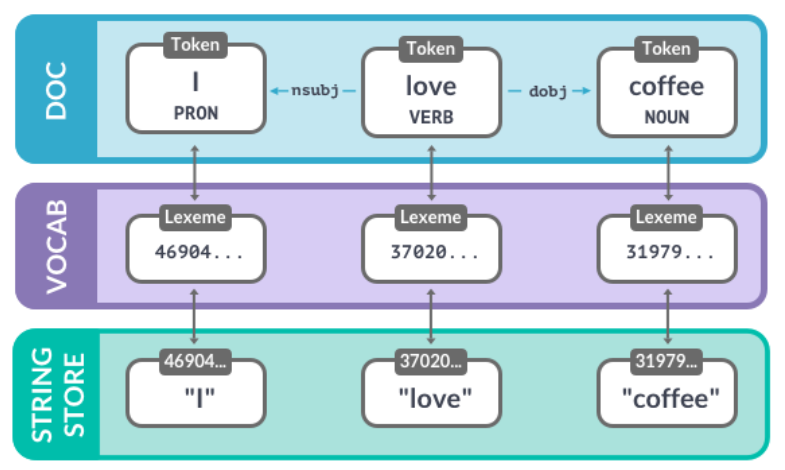


Aqui está um exemplo. O Doc contém algumas palavras- neste caso, os tokens "I", "love" e "coffee" com suas tags gramaticais e dependências. Cada token se refere a um lexema, que conhece o hash ID da palavra. Para obter a representação de string da palavra, spaCy procura o hash no armazenamento de string.

### Strings to hashes


In [6]:
# Look up the hash for the word "cat"
nlp = English()

doc = nlp("I love cat")

cat_hash = nlp.vocab.strings["cat"]
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[5439657043933447811]
print(cat_string)

5439657043933447811
cat


## Data Structures (2)

O Doc é uma das estruturas de dados centrais em spaCy. 

Ele é criado automaticamente quando você processa um texto com o objeto nlp. 

Mas você também pode instanciar a classe manualmente. Depois de criar o objeto nlp, podemos importar a classe Doc dos tokens de ponto spacy. 

Aqui estamos criando um Doc a partir de três palavras. Os espaços são uma lista de valores booleanos que indicam se a palavra é seguida por um espaço. Cada token inclui essa informação - até mesmo o último! A classe Doc leva três argumentos: 
* o vocabulário compartilhado, 
* as palavras 
* e os espaços.

In [13]:
from spacy.lang.en import English
from spacy.tokens import Doc, Span

nlp = English()

In [10]:
words = ['Hello','world','!']
spaces = [True, False, False]

In [12]:
doc = Doc(nlp.vocab, words=words, spaces=spaces)

Um Span é uma fatia de um Doc que consiste em um ou mais tokens. 

O Span leva pelo menos três argumentos: o doc ao qual se refere e o índice inicial e final do span. Lembre-se de que o índice final é exclusivo!

Para criar um Span manualmente, também podemos importar a classe de tokens no spacy. Podemos então instanciá-lo com o doc e o índice inicial e final do período. Para adicionar um rótulo de entidade ao intervalo, primeiro precisamos pesquisar a string no armazenamento de string. Podemos então fornecê-lo ao span como o argumento do rótulo. Os documentos são graváveis, portanto, podemos adicionar entidades manualmente, sobrescrevendo-as com uma lista de extensões.

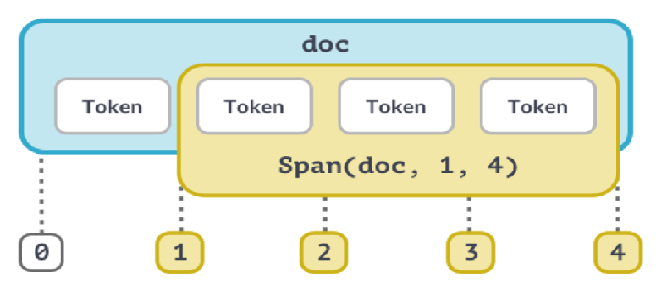

In [15]:
span = Span(doc, 0, 2)

span_with_label = Span(doc, 0, 2, label="GREETING")
doc.ents = [span_with_label]

Algumas dicas e truques antes de começar: 

* O Doc and Span são muito poderosos e otimizados para desempenho. Eles fornecem acesso a todas as referências e relações das palavras e frases. 
* Se sua aplicação precisa criar strings, certifique-se de converter o documento o mais tarde possível. 
* Se você fizer isso muito cedo, perderá todos os relacionamentos entre os tokens. 
* Para manter as coisas consistentes, tente usar atributos de token integrados sempre que possível. 

### Creating a Doc

In [16]:
# Import the Doc class
from spacy.tokens import Doc

In [18]:
# Desired text: "spaCy is cool!"
words = ['spaCy', 'is', 'cool', '!']
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


In [17]:
# Desired text: "Go, get started!"
words = ['Go', ',', 'get', 'started', '!']
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


In [19]:
# Desired text: "Oh, really?!"
words = ["Oh", ",", "really", "?", "!"]
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Oh, really?!


### Docs, spans and entities from scratch

In [20]:
from spacy.tokens import Doc, Span

words = ['I', 'like', 'David', 'Bowie']
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

I like David Bowie


In [21]:
# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label='PERSON')

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

[('David Bowie', 'PERSON')]


In [23]:
# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == 'PROPN':
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == 'VERB':
            print('Found a verb after a proper noun!')

## Word vectors and similarity

spaCy pode comparar dois objetos e prever o quão semelhantes eles são - por exemplo, documentos, spans ou tokens únicos. 

Os objetos tipo Doc, Token e Span possuem um método de similaridade de ponto que pega outro objeto e retorna um valor entre 0 e 1, indicando o quão semelhantes eles são. 

Uma coisa é muito importante: 

* para usar similaridade, você precisa de um modelo spaCy grande. Por exemplo, o modelo inglês médio ou grande - mas não o pequeno. 
* Portanto, se você quiser usar vetores, sempre use um modelo que termine em "md" ou "lg". 

Você pode encontrar mais detalhes sobre isso na documentação dos modelos.

In [25]:
import spacy

In [28]:
nlp = spacy.load("en_core_web_md") ## python -m spacy download pt_core_news_md

In [29]:
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")

In [30]:
print(doc1.similarity(doc2))

0.8627204117787385


Aqui está um exemplo. 

Digamos que queremos descobrir se dois documentos são semelhantes. 

* Primeiro, carregamos o modelo médio em inglês, "en_core_web_md". 
* Podemos então criar dois objetos doc e usar o método de similaridade do primeiro doc para compará-lo com o segundo. 
* Aqui, uma pontuação de similaridade bastante alta de 0-ponto-86 é prevista para "Gosto de fast food" e "Gosto de pizza". 

In [31]:
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.73695457


O mesmo funciona para tokens. De acordo com os vetores de palavras, os tokens "pizza" e "macarrão" são meio semelhantes e recebem uma pontuação de 0.7.

Você também pode usar os métodos de similaridade para comparar diferentes tipos de objetos. Por exemplo, um documento e um token. Aqui, a pontuação de similaridade é muito baixa e os dois objetos são considerados bastante diferentes. Outro exemplo comparando um intervalo - "pizza e hambúrgueres" - a um documento. A pontuação retornada aqui é 0.61.

In [32]:
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.32531983166759537


In [33]:
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.6199091710787739


**Como o spaCy prevê a similaridade?**

A similaridade é determinada usando vetores de palavras, representações multidimensionais dos significados das palavras.

Você já deve ter ouvido falar do Word2Vec, um algoritmo frequentemente usado para treinar vetores de palavras a partir de texto bruto. Os vetores podem ser adicionados aos modelos estatísticos do spaCy. Por padrão, a similaridade retornada por spaCy é a similaridade de cosseno entre dois vetores - mas isso pode ser ajustado se necessário.


Para dar uma ideia de como esses vetores se parecem, aqui está um exemplo. 

* Primeiro, carregamos o modelo de mídia novamente, que vem com vetores de palavras. 
* Em seguida, podemos processar um texto e pesquisar o vetor de um token usando o atributo .vector. 
* O resultado é um vetor de 300 dimensões da palavra "banana".

In [34]:
nlp = spacy.load("en_core_web_md")

In [35]:
doc = nlp("I have a banana")

print(doc[3].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2


Prever similaridade pode ser útil para muitos tipos de aplicativos. 

* Para recomendar a um usuário textos semelhantes com base nos que ele leu. 
* Também pode ser útil sinalizar conteúdo duplicado, como postagens em uma plataforma online. 

No entanto, é importante ter em mente que não existe uma definição objetiva do que é semelhante e o que não é. Sempre depende do contexto e do que a sua aplicação precisa fazer. 

Aqui está um exemplo: 

* os vetores de palavras padrão do spaCy atribuem uma pontuação de similaridade muito alta para "Eu gosto de gatos" e "Eu odeio gatos". 

Isso faz sentido, porque ambos os textos expressam sentimentos sobre gatos. Mas, em um contexto diferente, você pode considerar as frases como muito diferentes, porque falam sobre sentimentos opostos.

In [36]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9501446702124066


### Inspecting word vectors

In [37]:
# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(bananas_vector)

[-2.2009e-01 -3.0322e-02 -7.9859e-02 -4.6279e-01 -3.8600e-01  3.6962e-01
 -7.7178e-01 -1.1529e-01  3.3601e-02  5.6573e-01 -2.4001e-01  4.1833e-01
  1.5049e-01  3.5621e-01 -2.1508e-01 -4.2743e-01  8.1400e-02  3.3916e-01
  2.1637e-01  1.4792e-01  4.5811e-01  2.0966e-01 -3.5706e-01  2.3800e-01
  2.7971e-02 -8.4538e-01  4.1917e-01 -3.9181e-01  4.0434e-04 -1.0662e+00
  1.4591e-01  1.4643e-03  5.1277e-01  2.6072e-01  8.3785e-02  3.0340e-01
  1.8579e-01  5.9999e-02 -4.0270e-01  5.0888e-01 -1.1358e-01 -2.8854e-01
 -2.7068e-01  1.1017e-02 -2.2217e-01  6.9076e-01  3.6459e-02  3.0394e-01
  5.6989e-02  2.2733e-01 -9.9473e-02  1.5165e-01  1.3540e-01 -2.4965e-01
  9.8078e-01 -8.0492e-01  1.9326e-01  3.1128e-01  5.5390e-02 -4.2423e-01
 -1.4082e-02  1.2708e-01  1.8868e-01  5.9777e-02 -2.2215e-01 -8.3950e-01
  9.1987e-02  1.0180e-01 -3.1299e-01  5.5083e-01 -3.0717e-01  4.4201e-01
  1.2666e-01  3.7643e-01  3.2333e-01  9.5673e-02  2.5083e-01 -6.4049e-02
  4.2143e-01 -1.9375e-01  3.8026e-01  7.0883e-03 -2

### Comparing similarities


In [38]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8789265574516525


In [39]:
doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books" 
similarity = token1.similarity(token2)
print(similarity)

0.22325331


In [40]:
doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[12:15]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

0.7517392


## Combining models and rules

Combinar modelos estatísticos com sistemas baseados em regras é um dos truques mais poderosos que você deve ter em sua caixa de ferramentas de NLP.

Os modelos estatísticos são úteis se sua aplicação precisa ser capaz de generalizar com base em alguns exemplos. 

* Por exemplo, a detecção de nomes de produtos ou pessoas geralmente se beneficia de um modelo estatístico. 
* Em vez de fornecer uma lista de todos os nomes de pessoas, sua aplicação será capaz de prever se um intervalo de tokens é o nome de uma pessoa. 
* Da mesma forma, você pode prever rótulos de dependência para localizar relacionamentos sujeito / objeto. 

Para fazer isso, você usaria o reconhecedor de entidade, o analisador de dependência ou o identificador de classes gramaticais do spaCy.


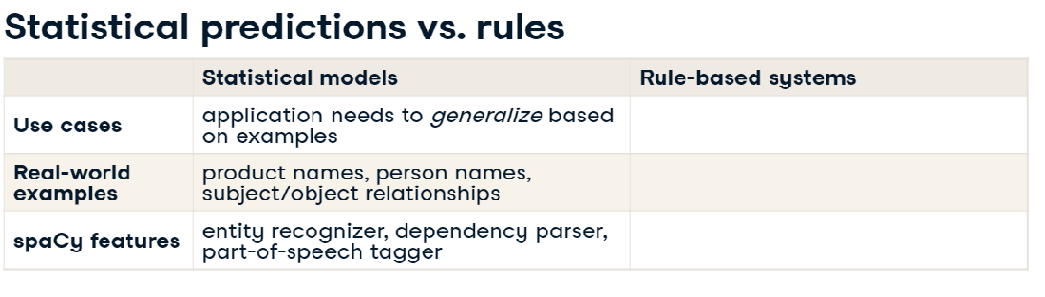

As abordagens baseadas em regras, por outro lado, são úteis se houver um número mais ou menos finito de instâncias que você deseja encontrar. 

Por exemplo, todos os países ou cidades do mundo, nomes de drogas ou mesmo raças de cães. 

No spaCy, você pode conseguir isso com regras de tokenização personalizadas, bem como o matcher e o matcher de frase.


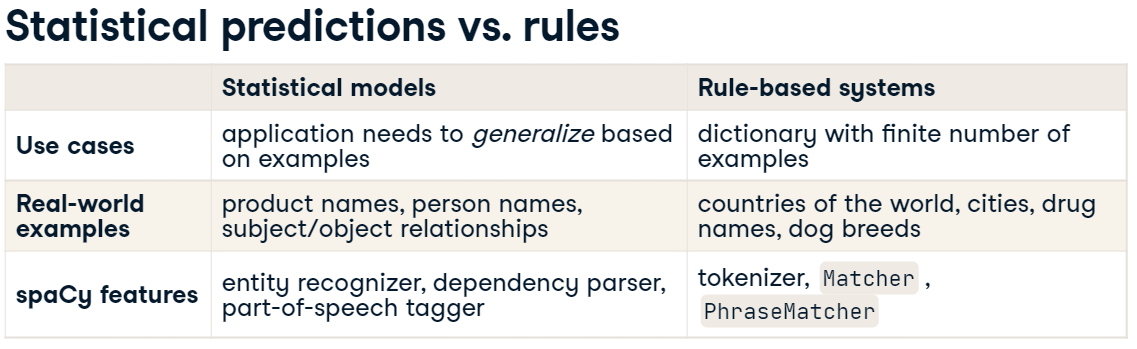

Recapitulando,  

* O matcher é inicializado com o vocabulário - geralmente  `nlp.vocab`. 
* Os padrões (pattern) são listas de dicionários e cada dicionário descreve um token e seus atributos. Os padrões podem ser adicionados ao matcher usando o método `matcher.add`. 
* Os operadores permitem que você especifique a freqüência de correspondência com um token. Por exemplo, "+" corresponderá uma ou mais vezes. Chamar o matcher em um objeto doc retornará uma lista das correspondências. Cada correspondência é uma tupla que consiste em um ID e o índice de token inicial e final no documento.



In [41]:
from spacy.matcher import Matcher

In [44]:
matcher = Matcher(nlp.vocab)

pattern = [[{'LEMMA':'love','POS':'VERB'},{'LOWER':'cats'}]]
matcher.add('LOVE_CATS',pattern)

pattern = [[{'TEXT':'very','OP':'+'},{'TEXT':'happy'}]]

doc = nlp("I love cats and I'm very very happy")

matches = matcher(doc)


Aqui está um exemplo de regra de correspondência para "golden retriever". 

* Se iterarmos sobre as correspondências retornadas pelo matcher, podemos obter o ID da correspondência e o índice inicial e final do período correspondido. 
* Podemos então descobrir mais sobre isso. Os objetos Span nos dão acesso ao documento original e a todos os outros atributos de token e recursos linguísticos previstos pelo modelo. 
* Por exemplo, podemos obter o token de raiz do span. Se o intervalo consistir em mais de um token, este será o token que decidirá a categoria da frase. 
* Por exemplo, a raiz de "Golden Retriever" é "Retriever". Também podemos encontrar o token principal da raiz. 
* Este é o "pai" sintático que governa a frase - neste caso, o verbo "ter". 
* Finalmente, podemos examinar o token anterior e seus atributos. Nesse caso, é um determinante, o artigo "a".

In [48]:
matcher = Matcher(nlp.vocab)
matcher.add('DOG',[[{'LOWER':'golden'},{'LOWER':'retriever'}]])

doc = nlp("I have a golden retriever")

for match_id, start, end in matcher (doc):
    span = doc[start:end]
    print('Matched span:', span.text)
    
    print("Root token:",span.root.text)
    print("Root head token:",span.root.head.text)
    
    print("Previous token:",doc[start-1].text, doc[start-1].pos_)

Matched span: golden retriever
Root token: retriever
Root head token: have
Previous token: a DET


O matcher de frase é outra ferramenta útil para encontrar sequências de palavras em seus dados. 

Ele realiza uma pesquisa por palavra-chave no documento, mas em vez de apenas localizar strings, fornece acesso direto aos tokens no contexto. Leva objetos Doc como padrões. Também é muito rápido. Isso o torna muito útil para combinar grandes dicionários e listas de palavras em grandes volumes de texto.


Aqui está um exemplo. 

O matcher de frase pode ser importado do spacy dot matcher e segue a mesma API do matcher regular. Em vez de uma lista de dicionários, passamos um objeto Doc como o padrão. Podemos então iterar as correspondências no texto, o que nos dá o ID da correspondência e o início e o fim da correspondência. Isso nos permite criar um objeto Span para os tokens correspondentes "Golden Retriever" para analisá-lo no contexto.

In [49]:
from spacy.matcher import PhraseMatcher

In [51]:
matcher = PhraseMatcher(nlp.vocab)

pattern =  nlp("Golden Retriever")
matcher.add('DOG',[pattern])

doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print('Matched span:', span.text)

Matched span: Golden Retriever


### Extracting countries and relationships

In [56]:
text = 'After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions more than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait. Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a "false renaissance" for the organization, given the more troubled missions that followed. Though the UN Charter had been written primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of simultaneous, serious crises within nations such as Somalia, Haiti, Mozambique, and the former Yugoslavia. The UN mission in Somalia was widely viewed as a failure after the US withdrawal following casualties in the Battle of Mogadishu, and the UN mission to Bosnia faced "worldwide ridicule" for its indecisive and confused mission in the face of ethnic cleansing. In 1994, the UN Assistance Mission for Rwanda failed to intervene in the Rwandan genocide amid indecision in the Security Council. Beginning in the last decades of the Cold War, American and European critics of the UN condemned the organization for perceived mismanagement and corruption. In 1984, the US President, Ronald Reagan, withdrew his nation\'s funding from UNESCO (the United Nations Educational, Scientific and Cultural Organization, founded 1946) over allegations of mismanagement, followed by Britain and Singapore. Boutros Boutros-Ghali, Secretary-General from 1992 to 1996, initiated a reform of the Secretariat, reducing the size of the organization somewhat. His successor, Kofi Annan (1997–2006), initiated further management reforms in the face of threats from the United States to withhold its UN dues. In the late 1990s and 2000s, international interventions authorized by the UN took a wider variety of forms. The UN mission in the Sierra Leone Civil War of 1991–2002 was supplemented by British Royal Marines, and the invasion of Afghanistan in 2001 was overseen by NATO. In 2003, the United States invaded Iraq despite failing to pass a UN Security Council resolution for authorization, prompting a new round of questioning of the organization\'s effectiveness. Under the eighth Secretary-General, Ban Ki-moon, the UN has intervened with peacekeepers in crises including the War in Darfur in Sudan and the Kivu conflict in the Democratic Republic of Congo and sent observers and chemical weapons inspectors to the Syrian Civil War. In 2013, an internal review of UN actions in the final battles of the Sri Lankan Civil War in 2009 concluded that the organization had suffered "systemic failure". One hundred and one UN personnel died in the 2010 Haiti earthquake, the worst loss of life in the organization\'s history. The Millennium Summit was held in 2000 to discuss the UN\'s role in the 21st century. The three day meeting was the largest gathering of world leaders in history, and culminated in the adoption by all member states of the Millennium Development Goals (MDGs), a commitment to achieve international development in areas such as poverty reduction, gender equality, and public health. Progress towards these goals, which were to be met by 2015, was ultimately uneven. The 2005 World Summit reaffirmed the UN\'s focus on promoting development, peacekeeping, human rights, and global security. The Sustainable Development Goals were launched in 2015 to succeed the Millennium Development Goals. In addition to addressing global challenges, the UN has sought to improve its accountability and democratic legitimacy by engaging more with civil society and fostering a global constituency. In an effort to enhance transparency, in 2016 the organization held its first public debate between candidates for Secretary-General. On 1 January 2017, Portuguese diplomat António Guterres, who previously served as UN High Commissioner for Refugees, became the ninth Secretary-General. Guterres has highlighted several key goals for his administration, including an emphasis on diplomacy for preventing conflicts, more effective peacekeeping efforts, and streamlining the organization to be more responsive and versatile to global needs.'


In [53]:
# Create a doc and find matches in it
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label='GPE')

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]
    
# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == 'GPE'])

[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('Cambodia', 'GPE'), ('US', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Yugoslavia', 'GPE'), ('Somalia', 'GPE'), ('US', 'GPE'), ('Bosnia', 'GPE'), ('Rwanda', 'GPE'), ('US', 'GPE'), ('Britain', 'GPE'), ('Singapore', 'GPE'), ('the United States', 'GPE'), ('Afghanistan', 'GPE'), ('the United States', 'GPE'), ('Iraq', 'GPE'), ('Darfur', 'GPE'), ('Sudan', 'GPE'), ('Kivu', 'GPE'), ('the Democratic Republic of Congo', 'GPE'), ('Haiti', 'GPE')]


In [58]:
# Create a doc and find matches in it
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE" and overwrite the doc.ents
    span = Span(doc, start, end, label='GPE')
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, '-->', span.text)